# OKCupid Dating App

The goal of this project is to find out whether it's possible to predict person's age and religious views via machine learning models, with sufficient accuracy, based on dating app profiles' data from OKCupid.  We are going to evaluate accuracy of different supervised models separately as well as create ensembles and assess resulting accuracy's shifts. Dataset is provided by Codecademy.com.

### Columns Description

Discrete, selectable information:

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

Open answer essays:

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

## Inspecting Data

For starters, let's perform necessary imports and load the `profiles.csv` data into `profiles` variable. 

In [1]:
# Basic imports related to analysis
import numpy as np
import pandas as pd

# Imports for visualisationin
import seaborn as sns
from matplotlib import pyplot as plt

# Imports for files processing
import os
import pickle

# Imports for ml 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Imports related to evaluation
from sklearn.metrics import classification_report

Note: we are going to use pickle to speed up running time, so in some cells will be placed pickle functions.

In [2]:
def pickle_object(object, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(object, f)

def unpickle_object(file_path):
    if not os.path.isfile(file_path):
        return None
    with open(file_path, 'rb') as f:
        return pickle.load(f)

# Serialise object
def with_pickle(file_path, fun):
    value = unpickle_object(file_path)
    if value is None:
        value = fun()
        pickle_object(value, file_path)
    return value

In [3]:
profiles = pd.read_csv('profiles.csv')
pd.set_option('display.max_columns', None)
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

As one can see there are 59946 rows and 31 columns in this dataset. As columns description tells us, almost all data is categorical, there are only 3 columns with numerical data types. 

Considering we are going to predict age and religion, let's see what information we have in those columns and how many representatives in each variation. 

<AxesSubplot:xlabel='count', ylabel='religion'>

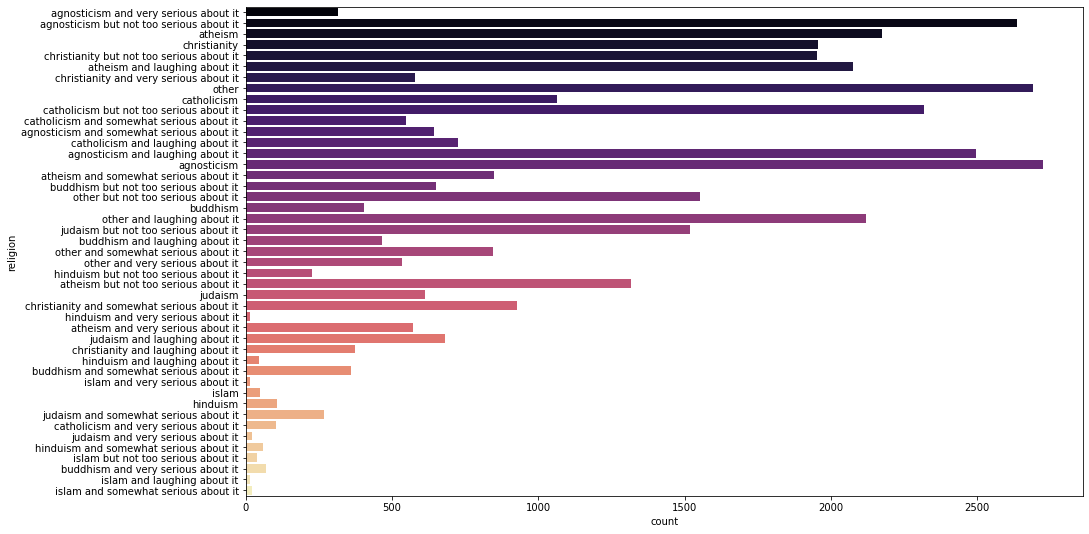

In [5]:
# Set figure size
plt.figure(figsize=(15,9))
# Draw countplot
sns.countplot(data=profiles, y="religion", palette='magma')

In `religion` column there is an additional parameter which tells a person's attitude toward's their religious views. We won't predict this attitude, just the religion itself, let's distill religions names.

Text(0, 0.5, 'Count')

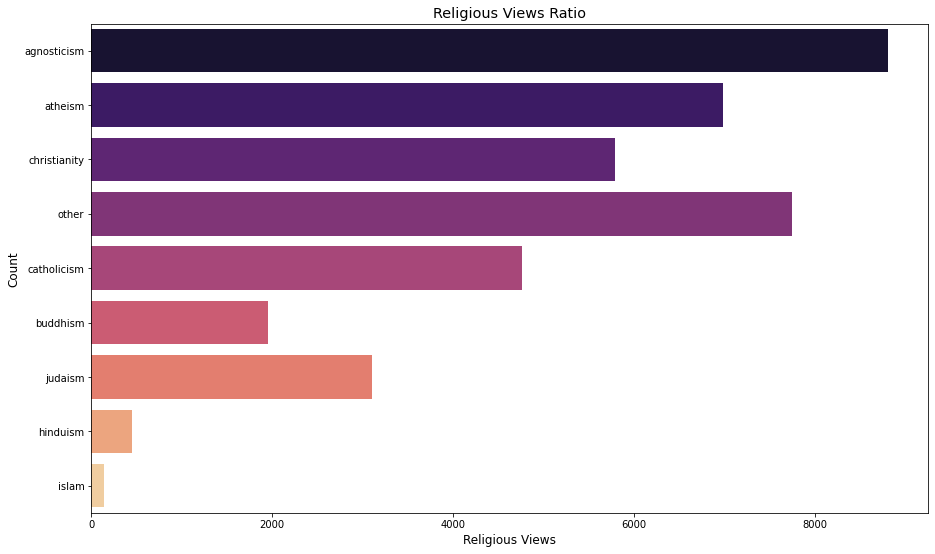

In [6]:
# Get only name of religion
profiles['religion'] = profiles.religion.str.split().str.get(0)
# Set figure size
plt.figure(figsize=(15,9))
# Draw countplot
ax = sns.countplot(data=profiles, y="religion", palette='magma')
# Add descriptions
ax.set_title('Religious Views Ratio', fontsize = 'x-large')
ax.set_xlabel('Religious Views', fontsize = 'large')
ax.set_ylabel('Count', fontsize = 'large')

There are not many users who consider themselves as professions of Islam or Hinduism, in some form, compared to other religions, that will, most likely, impact models making prediction of these branches of religious views unreliable. 

Now let's switch to age. 

In [7]:
profiles.age.unique()

array([ 22,  35,  38,  23,  29,  32,  31,  24,  37,  28,  30,  39,  33,
        26,  27,  20,  25,  40,  36,  21,  34,  43,  46,  41,  42,  45,
        18,  55,  50,  59,  44,  48,  54,  51,  62,  52,  19,  58,  66,
        53,  63,  47,  49,  61,  60,  57,  56,  65,  64,  68, 110,  69,
        67, 109], dtype=int64)

<AxesSubplot:xlabel='age', ylabel='Count'>

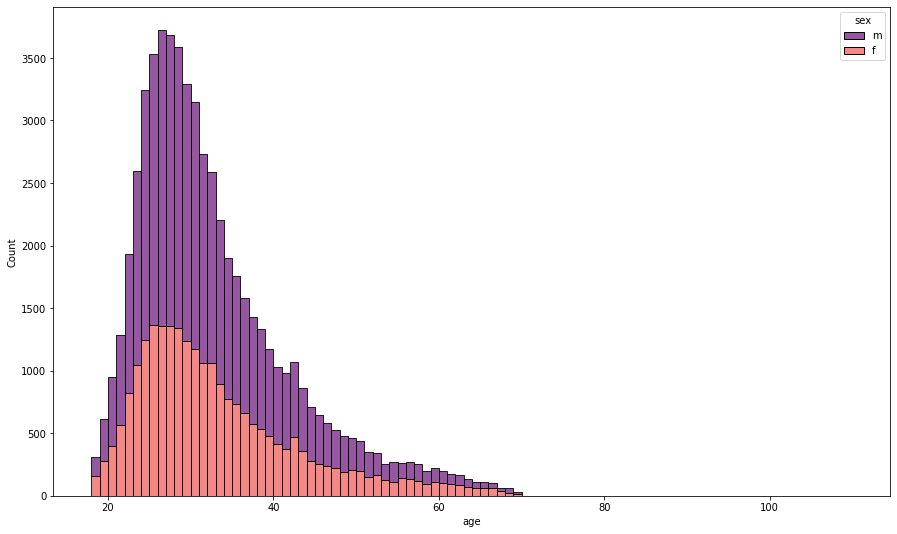

In [8]:
plt.figure(figsize=(15,9))
sns.histplot(data=profiles, x="age", hue="sex", binwidth = 1, multiple = "stack", palette='magma')

In [9]:
profiles.age.describe()

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

In [10]:
profiles.age.median()

30.0

`75%` of dating app users are younger than 37. That also arises an issue with equality of representative groups in a dataset. We'll try to mitigate this issue going further in our research. 


Not all columns of this dataset will be suitable for predicting age and religion:

- Some of them, like `height`, `sign`, `sex`, `last_online`, `pets` have nothing or very little to do with with persons current age or religious views. 
- We also won't use column `income`, because many users just put some nonsense in there. 
- Instead of using column `speaks` with languages we'll use `ethnicity` because there are no users' freestyle input there, like C++ or other programming languages. 
- We won't use `location`, because most people are from California, so it won't have much inmpact on results.
- The honesty of answers in the `status` column is highly dubious, considering context, so we'll also leave it behind. 
- We'll use columns with categorical variables as well as the ones with free text strings, but process them differently. 
    - Categorical variables will be mapped to numbers so that models could understand them them. 
    - While columns with `essays` will go through natural language processing stages.

## Models fit on Categorical Data
### Feature Modelling

We'll map the following columns' categorical variables to numbers: `body_type`, `diet`, `drinks`, `drugs`, `education`, `job`, `ethnicity`, `offspring`, `smokes` and `orientation` and look through their correlations with age and religion. There could be applied different approaches to mapping, depending on column's variables. Our main approach is the gradation from best cases to worst ones, from lowest ranks to highest, from lowest values to highest etc. Most of the mapped values are stored in the file `mapping_profiles` and imported here in a `mix_profiles` DataFrame.



In [11]:
# Import mapped data 
from mapping_profiles import map_to_numbers, age_to_num, age_to_str, map_variable_per_column, job_to_num
mix_profiles, map_body_t, map_diet, map_drinks, map_smoking, map_kids, map_edu, map_drugs, map_relig, map_orient = map_to_numbers(profiles)
# Map age
mix_profiles['age'] = profiles.age.apply(age_to_num)
# Map job
mix_profiles['job'] = profiles.job.apply(job_to_num)
mix_profiles.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,1.0,9.0,1.0,2.0,0.0,4.0,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,2,2012-06-28-20-30,"south san francisco, california",1.0,1,likes dogs and likes cats,agnosticism,m,gemini,1.0,english,single
1,2.0,4.0,6.0,3.0,1.0,2.0,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,2,2012-06-29-21-41,"oakland, california",1.0,1,likes dogs and likes cats,agnosticism,m,cancer,0.0,"english (fluently), spanish (poorly), french (...",single


Values in the `ethnicity` column will be encoded with binary code,  since there are no specific order or ranking in it. `1` - belonging to specific ethnic group, `0` - not belonging. Variables will be reorganized so each of unique ethnicity would be a separate column. One person can belong to many ethnic groups simultaneously, so there will be several `1`s in one row. 

In [12]:
# Filter profiles to get only ethnicity, remove NaNs from it and apply encoding
ethnicity = profiles.ethnicity.dropna().apply(map_variable_per_column).fillna(0)
ethnicity.head(2)

,asian,white,black,other,hispanic / latin,pacific islander,native american,middle eastern,indian
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now let's bring them back to `mix_profiles`, but already as numbers.

In [13]:
# Add ethnicity columns to mix_profiles
mix_profiles = mix_profiles.join(ethnicity)
# Rename repeated name "other" to more column specific
mix_profiles.rename(columns={'other': 'other_eth'}, inplace=True)
mix_profiles.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,asian,white,black,other_eth,hispanic / latin,pacific islander,native american,middle eastern,indian
0,1.0,9.0,1.0,2.0,0.0,4.0,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,2,2012-06-28-20-30,"south san francisco, california",1.0,1,likes dogs and likes cats,agnosticism,m,gemini,1.0,english,single,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,4.0,6.0,3.0,1.0,2.0,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,2,2012-06-29-21-41,"oakland, california",1.0,1,likes dogs and likes cats,agnosticism,m,cancer,0.0,"english (fluently), spanish (poorly), french (...",single,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For `religion` column, we'll apply a slightly different approach. Considering that different religions don't have ascending or descending qualities, and we need them as labels in one column - we'll assign each unique religion name a number from `0` to `10` without any particular meaning to it.

In [15]:
# Filter profiles to get only religion, remove NaNs from it
religion = profiles.religion.dropna()
# Create list of unique religions
unique_religions = list(religion.unique())
# Assing codes to each religion from unique religions list
religion = religion.apply(lambda r: unique_religions.index(r))
# Create a separate DataFrame
religion = pd.DataFrame({'num_religion': religion })
# Add religion DataFrame to mix_profiles
mix_profiles = mix_profiles.join(religion)
mix_profiles.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,asian,white,black,other_eth,hispanic / latin,pacific islander,native american,middle eastern,indian,num_religion
0,1.0,9.0,1.0,2.0,0.0,4.0,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,2,2012-06-28-20-30,"south san francisco, california",1.0,1,likes dogs and likes cats,agnosticism,m,gemini,1.0,english,single,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,4.0,6.0,3.0,1.0,2.0,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,2,2012-06-29-21-41,"oakland, california",1.0,1,likes dogs and likes cats,agnosticism,m,cancer,0.0,"english (fluently), spanish (poorly), french (...",single,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we are going find correlations between `age` and `num_religion` with values we've encoded. Let's create a slice of `mix_profiles` with only numerical data in it.

In [113]:
num_profiles = mix_profiles[[
    'age', 'num_religion', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'offspring',
    'smokes', 'asian', 'white', 'black', 'other_eth', 'job', 'orientation',
    'hispanic / latin', 'pacific islander', 'native american', 'middle eastern', 'indian', 
    ]]
len(num_profiles)


59946

### Find Correlations and Split Data

#### Age 

We got a DataFrame with almost `60 thousand` values in it, but in some columns `NaN`s are still present, we'll remove them on the next steps. Now let's see correlations of age with other numerical columns that we've selected.

In [114]:
num_profiles.corr()[:1]

,age,num_religion,body_type,diet,drinks,drugs,education,offspring,smokes,asian,white,black,other_eth,job,orientation,hispanic / latin,pacific islander,native american,middle eastern,indian
age,1.0,0.09916,0.05842,0.034472,-0.121266,-0.133721,0.113422,0.400974,-0.115239,-0.088838,0.102778,-0.031698,-0.026952,0.221853,-0.018952,-0.077764,-0.039271,-0.023456,-0.035368,-0.031729


Seems like not all among selected features significantly correlate with age. We are going to select only those that have correlation starting from `+-0.1` and more in either direction. 

In [76]:
# Select features and labels for prediction
age_labels_features = mix_profiles[['age', 'drinks', 'drugs', 'education', 'offspring', 'smokes', 'job']]
# Remove 'NaN's and create a separate DataFrame for these columns
age_labels_features = age_labels_features.dropna().copy()
len(age_labels_features)

17088

In [108]:
# Select slice with labels
age_labels = age_labels_features[['age']]
# Select slice with features
age_features = age_labels_features[['drinks', 'drugs', 'education', 'offspring', 'smokes', 'job']]
age_features.head(2)

,drinks,drugs,education,offspring,smokes,job
0,2.0,0.0,4.0,1.0,1.0,2
1,3.0,1.0,2.0,1.0,0.0,2


#### Religion

Now let's proceed with religion. We will apply the same filtration parameters to these correlations.

In [115]:
num_profiles.corr()[1:2]

,age,num_religion,body_type,diet,drinks,drugs,education,offspring,smokes,asian,white,black,other_eth,job,orientation,hispanic / latin,pacific islander,native american,middle eastern,indian
num_religion,0.09916,1.0,0.03882,0.065258,-0.0724,-0.082393,0.014881,0.15083,-0.03472,-0.02364,-0.078897,-0.006371,0.037658,0.027152,-0.00369,0.033506,0.056028,-0.00054,0.04103,0.117721


Seems like all values have very low correlations with religion, so we'll have to take all that are more or less `+-0.01`

In [85]:
# Select features and labels for prediction
relig_labels_features = mix_profiles[[
    'age', 'diet', 'drinks', 'drugs', 'offspring',
    'smokes', 'num_religion', 'job',
    'asian', 'white', 'other_eth',
    'hispanic / latin', 'pacific islander', 'middle eastern', 'indian' 
    ]]
# Remove 'NaN's and create a separate DataFrame for these columns
relig_labels_features = relig_labels_features.dropna().copy()
len(relig_labels_features)

10195

In [109]:
# Select slice with labels
relig_labels = relig_labels_features[['num_religion']]
# Select slice with features
relig_features = relig_labels_features[[
    'age', 'diet', 'drinks', 'drugs', 'offspring',
    'smokes', 'job', 'asian', 'white', 'other_eth',
    'hispanic / latin', 'pacific islander', 'middle eastern', 'indian' 
    ]]
relig_features.head(2)

,age,diet,drinks,drugs,offspring,smokes,job,asian,white,other_eth,hispanic / latin,pacific islander,middle eastern,indian
0,1.0,1.0,2.0,0.0,1.0,1.0,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,6.0,3.0,1.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [112]:
# Split data on training and testing sets
train_data_a, test_data_a, train_labels_a, test_labels_a = train_test_split(age_features, age_labels, random_state=2, test_size=.1)
train_data_r, test_data_r, train_labels_r, test_labels_r = train_test_split(relig_features, relig_labels, random_state=6)
print('Training set length for predicting age:', len(train_data_a))
print('Training set length for predicting religion:', len(train_data_r))

Training set length for predicting age: 15379
Training set length for predicting religion: 7646


### Train Models

### Age

In [57]:
# Instantiate and train classifier
RandomForestClassifier_a = RandomForestClassifier(random_state=4).fit(train_data_a, train_labels_a.values.ravel())

In [58]:
# Get accuracy of the classifier
print(round(RandomForestClassifier_a.score(test_data_a, test_labels_a), 4)*100, '%')

57.64 %


In [59]:
# Get detailed report
print(classification_report(test_labels_a, RandomForestClassifier_a.predict(test_data_a)))

              precision    recall  f1-score   support

         1.0       0.59      0.85      0.70       744
         2.0       0.47      0.27      0.34       518
         3.0       0.62      0.54      0.58       388
         4.0       0.56      0.08      0.15        59

    accuracy                           0.58      1709
   macro avg       0.56      0.44      0.44      1709
weighted avg       0.56      0.58      0.54      1709



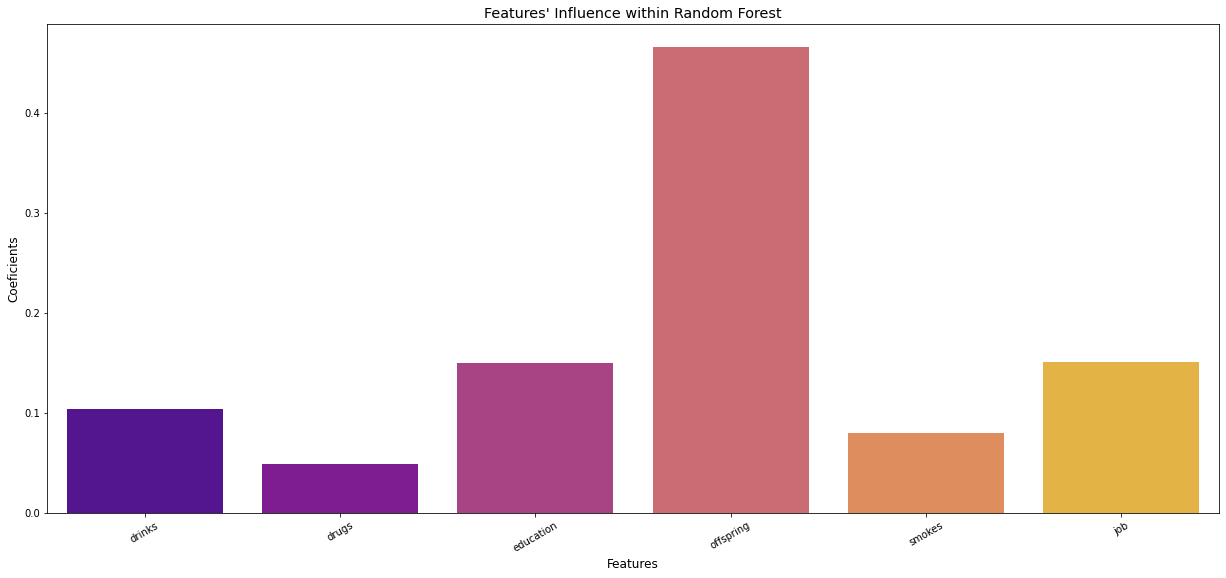

In [60]:
def visualise_barchart(feature_lst, values):
    # Prepare grid
    plt.figure(figsize = (21,9))
    
    # Draw barplot
    ax = sns.barplot(x = feature_lst, y = values, palette='plasma')

    # Add descriptions
    plt.title('Features\' Influence within Random Forest', fontsize='x-large')
    plt.xlabel('Features', fontsize='large')
    plt.ylabel('Coeficients', fontsize='large')
    ax.set_xticklabels(feature_lst, rotation=30)

    return plt.show()

# Display important features
visualise_barchart(
    RandomForestClassifier_a.feature_names_in_, 
    RandomForestClassifier_a.feature_importances_)

In [61]:
# Get best classifier with best score
def best_knn(train_data, train_labels, test_data, test_labels):
    best_k=0
    best_score = 0
    best_classifer = None
    for k in range(1, 200):
        current_k = k
        # Instantiate model
        current_classifier = KNeighborsClassifier(n_neighbors=current_k)
        # Train model
        current_classifier.fit(train_data, train_labels.values.ravel())
        # Get model's accuracy
        current_score = current_classifier.score(test_data, test_labels)
        if current_score > best_score:
            best_score = current_score
            best_k = current_k
            best_classifer = current_classifier
    return best_classifer, best_score

# Pickle best classifier with best score
KNeighborsClassifier_a, best_score_a = with_pickle('pickles/knn_classifier_a.pickle', lambda: best_knn(train_data_a, train_labels_a, test_data_a, test_labels_a)) 
print(round(best_score_a, 4)*100, '%')

57.93000000000001 %


### Religion

In [98]:
# Instantiate and train classifier
RandomForestClassifier_r = RandomForestClassifier(random_state=33).fit(train_data_r, train_labels_r.values.ravel())
# Get accuracy of the classifier
print(round(RandomForestClassifier_r.score(test_data_r, test_labels_r), 4)*100, '%')

27.66 %


In [99]:
# Get detailed report
print(classification_report(test_labels_r, RandomForestClassifier_r.predict(test_data_r)))

              precision    recall  f1-score   support

         0.0       0.24      0.38      0.29       546
         1.0       0.29      0.27      0.28       478
         2.0       0.31      0.32      0.32       401
         3.0       0.30      0.29      0.30       516
         4.0       0.33      0.20      0.25       304
         5.0       0.10      0.04      0.06       124
         6.0       0.17      0.06      0.09       143
         7.0       0.45      0.52      0.48        27
         8.0       0.40      0.20      0.27        10

    accuracy                           0.28      2549
   macro avg       0.29      0.25      0.26      2549
weighted avg       0.28      0.28      0.27      2549



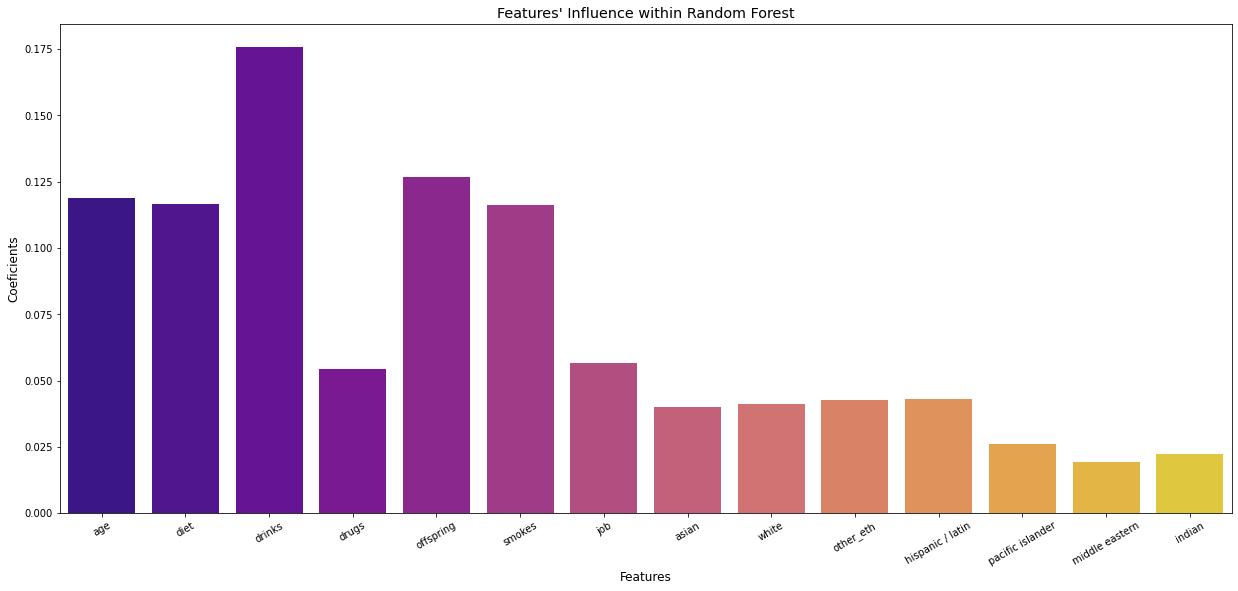

In [100]:
visualise_barchart(
    RandomForestClassifier_r.feature_names_in_, 
    RandomForestClassifier_r.feature_importances_)

In [101]:
# Pickle best classifier with best score
KNeighborsClassifier_r, best_score_r = with_pickle('pickles/knn_classifier_r.pickle', lambda: best_knn(train_data_r, train_labels_r, test_data_r, test_labels_r))
# Get accuracy of the classifier
print(round(best_score_r, 4)*100, '%') 

29.34 %


In [107]:
# Get detailed report
print(classification_report(test_labels_r, KNeighborsClassifier_r.predict(test_data_r), zero_division=1))

              precision    recall  f1-score   support

         0.0       0.26      0.36      0.30       546
         1.0       0.29      0.33      0.31       478
         2.0       0.28      0.40      0.33       401
         3.0       0.35      0.31      0.33       516
         4.0       0.35      0.17      0.23       304
         5.0       0.40      0.02      0.03       124
         6.0       0.24      0.07      0.11       143
         7.0       0.44      0.44      0.44        27
         8.0       1.00      0.00      0.00        10

    accuracy                           0.29      2549
   macro avg       0.40      0.23      0.23      2549
weighted avg       0.31      0.29      0.28      2549



## NLP Part
### Select Columns for NLP

In [ ]:
from bs4 import BeautifulSoup

from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from nltk.classify import ClassifierI
from statistics import mode

# Imports for preprocessing
from nltk.corpus import stopwords
import re, nltk
from nltk import pos_tag_sents, RegexpParser
from nltk import word_tokenize, sent_tokenize
from nltk import word_tokenize, sent_tokenize

In [ ]:
columns = ['essay0','essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

essays_a = mix_profiles.dropna(subset = 'age').dropna(how='all', subset=columns)
essays_a['essays_combined'] = essays_a[columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
essays_a = essays_a[['age', 'essays_combined']].reset_index(drop=True).copy()
essays_a.head()

,age,essays_combined
0,1.0,about me:<br />\n<br />\ni would love to think...
1,2.0,i am a chef: this is what that means.<br />\n1...
2,2.0,"i'm not ashamed of much, but writing public te..."
3,1.0,i work in a library and go to school. . . read...
4,1.0,hey how's it going? currently vague on the pro...


In [ ]:
print('Initial number:', len(mix_profiles))
print('Final number:',  len(essays_a))

Initial number: 59946
Final number: 57629


In [ ]:
essays_r = mix_profiles.dropna(subset = 'num_religion').dropna(how='all', subset=columns)
essays_r['essays_combined'] = essays_r[columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
essays_r = essays_r[['num_religion', 'essays_combined']].reset_index(drop=True).copy()
essays_r.head()

,num_religion,essays_combined
0,0.0,about me:<br />\n<br />\ni would love to think...
1,0.0,i am a chef: this is what that means.<br />\n1...
2,1.0,"i'm an australian living in san francisco, but..."
3,2.0,"nan writing. meeting new people, spending time..."
4,2.0,"nan oh goodness. at the moment i have 4 jobs, ..."


In [ ]:
print('Initial number:', len(mix_profiles))
print('Final number:',  len(essays_r))

Initial number: 59946
Final number: 38599


### Pre-Processing

In [ ]:
def remove_noise(text):
    soup = BeautifulSoup(text, features="html.parser")

    # Remove all script and style elements
    for script in soup(["script", "style"]):
        script.extract()   

    # Get text
    text = soup.get_text()

    # Break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # Break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # Drop blank lines
    text = ' '.join(chunk for chunk in chunks if chunk)

    return text 

In [ ]:
essays_a.essays_combined = with_pickle('pickles/noise_removed_a.pickle', lambda : essays_a.essays_combined.apply(remove_noise))
essays_a.essays_combined[5][:1000]

"i'm an australian living in san francisco, but don't hold that against me. i spend most of my days trying to build cool stuff for my company. i speak mandarin and have been known to bust out chinese songs at karaoke. i'm pretty cheeky. someone asked me if that meant something about my arse, which i find really funny. i'm a little oddball. i have a wild imagination; i like to think of the most improbable reasons people are doing things just for fun. i love to laugh and look for reasons to do so. occasionally this gets me in trouble because people think i'm laughing at them. sometimes i am, but more often i'm only laughing at myself. i'm an entrepreneur (like everyone else in sf, it seems) and i love what i do. i enjoy parties and downtime in equal measure. intelligence really turns me on and i love people who can teach me new things. building awesome stuff. figuring out what's important. having adventures. looking for treasure. imagining random shit. laughing at aforementioned random s

In [ ]:
essays_r.essays_combined = with_pickle('pickles/noise_removed_r.pickle', lambda : essays_r.essays_combined.apply(remove_noise))
essays_r.essays_combined[5][:1000]

"my names jake. i'm a creative guy and i look for the same in others. i'm easy going, practical and i don't have many hang ups. i appreciate life and try to live it to the fullest. i'm sober and have been for the past few years. i love music and i play guitar. i like tons of different bands. i'm an artist and i love to paint/draw etc. and i love creative people. i've got to say i'm not too big on internet dating. you cant really get an earnest impression of anyone from a few polished paragraphs. but we'll see, you never know. i have an apartment. i like to explore and check things out. i like good japanese and peruvian food. nothing beats good ceviche on a hot day. or a hot chai on a cold one. i've been working on my a.o.d. certification but have stalled out. i'm hoping to pursue art but have yet to find the best venue. recently i've been working on a construction job in belmont. it's not my dream job. but for the time being it affords me other opportunities. plus it keeps me in shape,

In [ ]:
def word_sent_tokenize(text):
    word_sent_tokenized = [word_tokenize(s) for s in sent_tokenize(text)]
    return word_sent_tokenized

In [ ]:
essays_a['sent_tokenized'] = with_pickle('pickles/sent_tokenized_a.pickle', lambda : essays_a.essays_combined.apply(word_sent_tokenize))
essays_a.sent_tokenized[5][:1]

[['i',
  "'m",
  'an',
  'australian',
  'living',
  'in',
  'san',
  'francisco',
  ',',
  'but',
  'do',
  "n't",
  'hold',
  'that',
  'against',
  'me',
  '.']]

In [ ]:
essays_r['sent_tokenized'] = with_pickle('pickles/sent_tokenized_r.pickle', lambda : essays_r.essays_combined.apply(word_sent_tokenize))
essays_r.sent_tokenized[5][:1]

[['my', 'names', 'jake', '.']]

In [ ]:
essays_a['sent_pos_tagged'] = with_pickle('pickles/pos_tagged_a.pickle', lambda : essays_a.sent_tokenized.apply(pos_tag_sents))
essays_a.sent_pos_tagged[5][:1]

[[('i', 'NN'),
  ("'m", 'VBP'),
  ('an', 'DT'),
  ('australian', 'JJ'),
  ('living', 'NN'),
  ('in', 'IN'),
  ('san', 'JJ'),
  ('francisco', 'NN'),
  (',', ','),
  ('but', 'CC'),
  ('do', 'VBP'),
  ("n't", 'RB'),
  ('hold', 'VB'),
  ('that', 'DT'),
  ('against', 'IN'),
  ('me', 'PRP'),
  ('.', '.')]]

In [ ]:
essays_r['sent_pos_tagged'] = with_pickle('pickles/pos_tagged_r.pickle', lambda : essays_r.sent_tokenized.apply(pos_tag_sents))
essays_r.sent_pos_tagged[5][:1]

[[('my', 'PRP$'), ('names', 'NNS'), ('jake', 'VBP'), ('.', '.')]]

### Feature Modelling

In [ ]:
stop_words = set(stopwords.words('english'))
# List speach parts that will be analysed by classifiers
allowed_word_types = ['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS']

In [ ]:
def most_common(dataset):   
    # Create list of most common words
    all_words = []
    for names, cell_values in dataset.sent_pos_tagged.iteritems():
        for sentence in cell_values:
            for word, part_of_speach in sentence:
                if not word in stop_words and part_of_speach in allowed_word_types:
                    all_words.append(word)

    # Count number of occurances for each word and sort in desc. order
    all_words = nltk.FreqDist(all_words)

    # Take most common from all available words
    most_common = list(all_words.keys())[:4000]

    return most_common

In [ ]:
most_common_a = most_common(essays_a)
most_common_a[:10]

['intellectual',
 'dumbest',
 'smart',
 'smartest',
 'dumb',
 "n't",
 'odd',
 'instead',
 'underwater',
 'favorite']

In [ ]:
most_common_r = most_common(essays_r)
most_common_r[:10]

['intellectual',
 'dumbest',
 'smart',
 'smartest',
 'dumb',
 "n't",
 'odd',
 'instead',
 'underwater',
 'favorite']

In [ ]:
# Create a dictionary where word has value True if it is in list of most common
def find_features(sentences, most_common):
    words = [word for sentence in sentences for word in sentence]
    features = {}
    for word in most_common:
        features[word] = word in words
    return features

def find_features_in_df(dataset, most_common, column):
    return dataset.apply(lambda row: (find_features(row['sent_tokenized'], most_common), row[column]), axis=1)

In [ ]:
feature_sets_a = with_pickle('pickles/find_features_a.pickle', lambda : find_features_in_df(essays_a, most_common_a, column = 'age'))

In [ ]:
feature_sets_a

0        ({'intellectual': True, 'dumbest': True, 'smar...
1        ({'intellectual': False, 'dumbest': False, 'sm...
2        ({'intellectual': True, 'dumbest': False, 'sma...
3        ({'intellectual': False, 'dumbest': False, 'sm...
4        ({'intellectual': False, 'dumbest': False, 'sm...
                               ...                        
57624    ({'intellectual': False, 'dumbest': False, 'sm...
57625    ({'intellectual': False, 'dumbest': False, 'sm...
57626    ({'intellectual': False, 'dumbest': False, 'sm...
57627    ({'intellectual': False, 'dumbest': False, 'sm...
57628    ({'intellectual': False, 'dumbest': False, 'sm...
Length: 57629, dtype: object

In [ ]:
feature_sets_r = with_pickle('pickles/find_features_r.pickle', lambda : find_features_in_df(essays_r, most_common_r, column='num_religion'))

In [ ]:
feature_sets_r

0        ({'intellectual': True, 'dumbest': True, 'smar...
1        ({'intellectual': False, 'dumbest': False, 'sm...
2        ({'intellectual': False, 'dumbest': False, 'sm...
3        ({'intellectual': False, 'dumbest': False, 'sm...
4        ({'intellectual': False, 'dumbest': False, 'sm...
                               ...                        
38594    ({'intellectual': False, 'dumbest': False, 'sm...
38595    ({'intellectual': False, 'dumbest': False, 'sm...
38596    ({'intellectual': False, 'dumbest': False, 'sm...
38597    ({'intellectual': False, 'dumbest': False, 'sm...
38598    ({'intellectual': False, 'dumbest': False, 'sm...
Length: 38599, dtype: object

In [ ]:
# Create training set from the list of marked words
training_sets_a = feature_sets_a[:57000]
# Create training set from the list of marked words
training_sets_r = feature_sets_r[:38000]

# Create testing set from the list of marked words that are not in training set
testing_sets_a = feature_sets_a[57000:]
testing_sets_r = feature_sets_r[38000:]

In [ ]:
Naive_Bayes_classifier_a = with_pickle('pickles/nb_classifier.pickle', lambda : nltk.NaiveBayesClassifier.train(training_sets_a))

In [ ]:
nltk.classify.accuracy(Naive_Bayes_classifier_a, testing_sets_a)*100

57.710651828298886

In [ ]:
LogisticRegression_classifier_a = with_pickle('pickles/logistic_regr_classifier.pickle', lambda : SklearnClassifier(LogisticRegression(max_iter = 5000)).train(training_sets_a))

In [ ]:
nltk.classify.accuracy(LogisticRegression_classifier_a, testing_sets_a)*100

64.06995230524643

In [ ]:
LinearSVC_classifier_a = with_pickle('pickles/linear_svc_classifier.pickle', lambda : SklearnClassifier(LinearSVC(max_iter = 10000)).train(training_sets_a))

In [ ]:
nltk.classify.accuracy(LinearSVC_classifier_a, testing_sets_a)*100

63.27503974562798

In [ ]:
Naive_Bayes_classifier_r = with_pickle('pickles/nb_classifier_r.pickle', lambda : nltk.NaiveBayesClassifier.train(training_sets_r))

In [ ]:
nltk.classify.accuracy(Naive_Bayes_classifier_r, testing_sets_r)*100

24.707846410684475

In [ ]:
LogisticRegression_classifier_r = with_pickle('pickles/logistic_regr_classifier_r.pickle', lambda : SklearnClassifier(LogisticRegression(max_iter = 5000)).train(training_sets_r))

In [ ]:
nltk.classify.accuracy(LogisticRegression_classifier_r, testing_sets_a)*100

17.170111287758345

In [ ]:
LinearSVC_classifier_r = with_pickle('pickles/linear_svc_classifier_r.pickle', lambda : SklearnClassifier(LinearSVC(max_iter = 7000)).train(training_sets_r))

In [ ]:
nltk.classify.accuracy(LinearSVC_classifier_r, testing_sets_r)*100

29.04841402337229

In [ ]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    # Determine whether review is positive or negative
    def classify(self, features):
        votes = []
        for classifier in self._classifiers:
            vote = classifier.classify(features)
            votes.append(vote)
        return mode(votes)
    # Give confidence percentages
    def confidence(self, features):
        votes = []
        for classifier in self._classifiers:
            vote = classifier.classify(features)
            votes.append(vote)
        chosen_votes = votes.count(mode(votes))
        conf = chosen_votes / len(votes)
        return conf

voted_classifier_age = VoteClassifier(
    Naive_Bayes_classifier_a,
    LogisticRegression_classifier_a,
    LinearSVC_classifier_a
    )

voted_classifier_relig = VoteClassifier(
    Naive_Bayes_classifier_r,
    LogisticRegression_classifier_r,
    LinearSVC_classifier_r
    )

In [ ]:
nltk.classify.accuracy(voted_classifier_age, testing_sets_a)*100

63.27503974562798

In [ ]:
nltk.classify.accuracy(voted_classifier_relig, testing_sets_r)*100

29.883138564273793

In [ ]:
validation_a = essays_a[-10:].copy()
validation_a['predicted_age'] = [voted_classifier_age.classify(testing_sets_a[i][0]) for i, row in essays_a.iterrows()]
validation_a['predict_confidence'] = [voted_classifier_age.confidence(testing_sets_a[i][0])*100 for i, row in essays_a.iterrows()]
validation_a = validation_a[['age', 'predicted_age', 'predict_confidence', 'essays_combined']]
validation_a['age'] = validation_a.age.apply(age_to_str)
validation_a['predicted_age'] = validation_a.predicted_age.apply(age_to_str)
validation_a


In [ ]:
validation_r = essays_r[-10:].copy()
validation_r['predicted_religion'] = [voted_classifier_relig.classify(testing_sets_r[i][0]) for i, row in validation_r.iterrows()]
validation_r['predict_confidence'] = [voted_classifier_relig.confidence(testing_sets_r[i][0])*100 for i, row in validation_r.iterrows()]
validation_r['religion'] = validation_r.num_religion.apply(lambda value: map_relig[value])
validation_r['predicted_religion'] = validation_r.predicted_religion.apply(lambda value: map_relig[value])
validation_r = validation_r[['religion', 'predicted_religion', 'predict_confidence', 'essays_combined']]

validation_r

,religion,predicted_religion,predict_confidence,essays_combined
38589,judaism,agnosticism,66.666667,i'm an east coast/west coast hybrid who's live...
38590,atheism,christianity,66.666667,nan nan nan my infectious laugh :) nan nan nan...
38591,judaism,catholicism,33.333333,a cautious photo for a cautious dude (i'm havi...
38592,other,agnosticism,66.666667,"i was born, raised and live in the san francis..."
38593,agnosticism,other,100.000000,"real deal: i am sensitive (sorry, tears includ..."
38594,catholicism,christianity,100.000000,"vibrant, expressive, caring optimist. i love b..."
38595,agnosticism,atheism,100.000000,i'm nick. i never know what to write about mys...
38596,christianity,christianity,100.000000,"hello! i enjoy traveling, watching movies, and..."
38597,agnosticism,catholicism,33.333333,"""all i have in this world are my balls and my ..."
38598,catholicism,atheism,100.000000,"is it odd that having a little ""enemy"" status ..."


TBC